<a href="https://colab.research.google.com/github/SeoyoungOhMe/skt-fly-ai-challenger-class/blob/master/09_rnn_regression_samsung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순환신경망 주식예측
- 삼성주식 데이터

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### 1.데이터준비

In [163]:
samsung = pd.read_csv('/content/005930.KS.csv')
samsung.shape

(6019, 7)

In [164]:
df = samsung.copy()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4514.581543,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4122.972656,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4152.526855,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4093.417969,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4263.360352,46880000


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6019 non-null   object 
 1   Open       6019 non-null   float64
 2   High       6019 non-null   float64
 3   Low        6019 non-null   float64
 4   Close      6019 non-null   float64
 5   Adj Close  6019 non-null   float64
 6   Volume     6019 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 329.3+ KB


In [166]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6019 non-null   datetime64[ns]
 1   Open       6019 non-null   float64       
 2   High       6019 non-null   float64       
 3   Low        6019 non-null   float64       
 4   Close      6019 non-null   float64       
 5   Adj Close  6019 non-null   float64       
 6   Volume     6019 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 329.3 KB


In [167]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4514.581543,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4122.972656,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4152.526855,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4093.417969,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4263.360352,46880000


In [168]:
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4514.581543,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,4122.972656,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,4152.526855,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,4093.417969,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,4263.360352,46880000


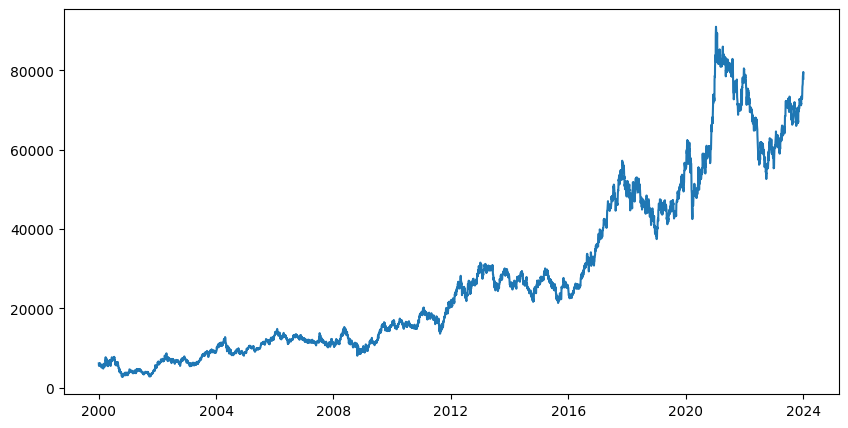

In [169]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'])
plt.show()

In [170]:
# 피처 추출

df['MA3'] = np.around(df['Close'].rolling(window=3).mean(), 0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA3
Date,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4514.581543,74195000,NaN
2000-01-05,5800.0,6060.0,5520.0,5580.0,4122.972656,74680000,NaN
2000-01-06,5750.0,5780.0,5580.0,5620.0,4152.526855,54390000,5770.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4093.417969,40305000,5580.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4263.360352,46880000,5643.0


In [171]:
df['MA5'] = np.around(df['Close'].rolling(window=5).mean(), 0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA3,MA5
Date,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4514.581543,74195000,NaN,NaN
2000-01-05,5800.0,6060.0,5520.0,5580.0,4122.972656,74680000,NaN,NaN
2000-01-06,5750.0,5780.0,5580.0,5620.0,4152.526855,54390000,5770.0,NaN
2000-01-07,5560.0,5670.0,5360.0,5540.0,4093.417969,40305000,5580.0,NaN
2000-01-10,5600.0,5770.0,5580.0,5770.0,4263.360352,46880000,5643.0,5724.0


In [172]:
df['Mid'] = np.around((df['Open'] + df['Close'])/2, 0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA3,MA5,Mid
Date,,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4514.581543,74195000,NaN,NaN,6055.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4122.972656,74680000,NaN,NaN,5690.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4152.526855,54390000,5770.0,NaN,5685.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4093.417969,40305000,5580.0,NaN,5550.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4263.360352,46880000,5643.0,5724.0,5685.0


In [173]:
df.isna().sum(axis=0)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA3          2
MA5          4
Mid          0
dtype: int64

In [174]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,6019.0,2.750416e+04,2.183309e+04,2540.000000,1.056000e+04,1.910000e+04,4.430000e+04,9.030000e+04
High,6019.0,2.777173e+04,2.200310e+04,2760.000000,1.073000e+04,1.932000e+04,4.482500e+04,9.680000e+04
Low,6019.0,2.722825e+04,2.165059e+04,2420.000000,1.042000e+04,1.886000e+04,4.380000e+04,8.950000e+04
Close,6019.0,2.749727e+04,2.181701e+04,2730.000000,1.056000e+04,1.916000e+04,4.432500e+04,9.100000e+04
Adj Close,6019.0,2.391481e+04,2.140201e+04,2017.153564,7.940696e+03,1.498650e+04,3.864341e+04,8.628670e+04
Volume,6019.0,2.119537e+07,1.515231e+07,0.000000,1.164138e+07,1.710540e+07,2.631302e+07,1.642150e+08
MA3,6017.0,2.749238e+04,2.180581e+04,2790.000000,1.058700e+04,1.906000e+04,4.436700e+04,9.043300e+04
MA5,6015.0,2.748751e+04,2.179516e+04,2810.000000,1.061200e+04,1.906400e+04,4.442000e+04,8.996000e+04
Mid,6019.0,2.750072e+04,2.182386e+04,2635.000000,1.057000e+04,1.912000e+04,4.431250e+04,9.050000e+04


In [175]:
# Volume 값이 0인 데이터는 결측치 처리하기

df['Volume'] = df['Volume'].replace(0, np.nan)
df.isna().sum(axis=0)

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       127
MA3            2
MA5            4
Mid            0
dtype: int64

In [176]:
df.shape

(6019, 9)

In [177]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA3', 'MA5',
       'Mid'],
      dtype='object')

In [178]:
X = df[['Open', 'High', 'Low', 'Volume', 'MA3', 'MA5', 'Mid']]
y = df['Close']

X.shape, y.shape

((6019, 7), (6019,))

In [179]:
idx = int(len(X) * 0.8)
idx

4815

In [180]:
X_train = X.iloc[:idx, :]
y_train = y.iloc[:idx]

X_test = X.iloc[idx: , :]
y_test = y.iloc[idx:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4815, 7), (4815,), (1204, 7), (1204,))

In [181]:
def make_sequence_dataset(X, y, window_size):
    feature_list = []
    label_list = []

    for i in range(len(X)-window_size):
        feature_list.append(X[i:i+window_size])
        label_list.append(y[i+window_size])

    return np.array(feature_list), np.array(label_list)

In [182]:
# 결측치 처리

X_train = X_train.dropna()
y_train = y_train[X_train.index]

In [183]:
# 정규화

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_train_s[:10]

array([[0.05567686, 0.05496713, 0.05815237, 0.28535907, 0.0527386 ,
        0.05379382, 0.05573321],
       [0.05967977, 0.06099343, 0.06164888, 0.36371468, 0.05366286,
        0.05252983, 0.05774326],
       [0.05585881, 0.05441928, 0.05852043, 0.17779902, 0.05477198,
        0.0530503 , 0.05536775],
       [0.05567686, 0.05441928, 0.05778432, 0.25070354, 0.05440228,
        0.05338488, 0.05518502],
       [0.05786026, 0.05697589, 0.05999264, 0.30055513, 0.05477198,
        0.05446299, 0.0573778 ],
       [0.06295488, 0.06245435, 0.06440927, 0.38661535, 0.05711962,
        0.0556898 , 0.06240292],
       [0.06586608, 0.06208912, 0.06551343, 0.2754923 , 0.05952271,
        0.05691661, 0.06386478],
       [0.06295488, 0.05989774, 0.06514538, 0.2447043 , 0.06031758,
        0.05780884, 0.0611238 ],
       [0.06040757, 0.05989774, 0.06256901, 0.22710245, 0.05994787,
        0.05903565, 0.06057561],
       [0.06204512, 0.05880205, 0.06367317, 0.19798937, 0.05859844,
        0.05922153, 0.0

In [184]:
X_train.shape, y_train.shape

((4697, 7), (4697,))

In [185]:
X_train, y_train = make_sequence_dataset(X_train_s, y_train, 20)
X_train.shape, y_train.shape

((4677, 20, 7), (4677,))

### 2.모델만들기

In [186]:
from keras import layers

model = keras.Sequential([
    layers.LSTM(units=32, activation='tanh', return_sequences=True, input_shape=(20, 7)),
    layers.LSTM(units=32, activation='tanh'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 20, 32)            5120      
                                                                 
 lstm_8 (LSTM)               (None, 32)                8320      
                                                                 
 dense_7 (Dense)             (None, 8)                 264       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13713 (53.57 KB)
Trainable params: 13713 (53.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [187]:
# rmsprop  = keras.optimizers.experimental.RMSprop(
#     learning_rate=0.01,
# )

model.compile(
    loss='mse',
    optimizer='rmsprop',
    metrics=['mse']
)

In [188]:
EPOCHS = 50
BATCH_SIZE=32

history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
117/117 [==============================] - 7s 27ms/step - loss: 257066400.0000 - mse: 257066400.0000 - val_loss: 1525737344.0000 - val_mse: 1525737344.0000
Epoch 2/50
117/117 [==============================] - 2s 20ms/step - loss: 256800016.0000 - mse: 256800016.0000 - val_loss: 1524973952.0000 - val_mse: 1524973952.0000
Epoch 3/50
117/117 [==============================] - 3s 23ms/step - loss: 256474416.0000 - mse: 256474416.0000 - val_loss: 1524000512.0000 - val_mse: 1524000512.0000
Epoch 4/50
117/117 [==============================] - 3s 24ms/step - loss: 256073328.0000 - mse: 256073328.0000 - val_loss: 1522825856.0000 - val_mse: 1522825856.0000
Epoch 5/50
117/117 [==============================] - 2s 20ms/step - loss: 255597616.0000 - mse: 255597616.0000 - val_loss: 1521445888.0000 - val_mse: 1521445888.0000
Epoch 6/50
117/117 [==============================] - 2s 19ms/step - loss: 255040336.0000 - mse: 255040336.0000 - val_loss: 1519857536.0000 - val_mse: 1519857536.000

In [189]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')

    plt.legend()

    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()
    plt.show()

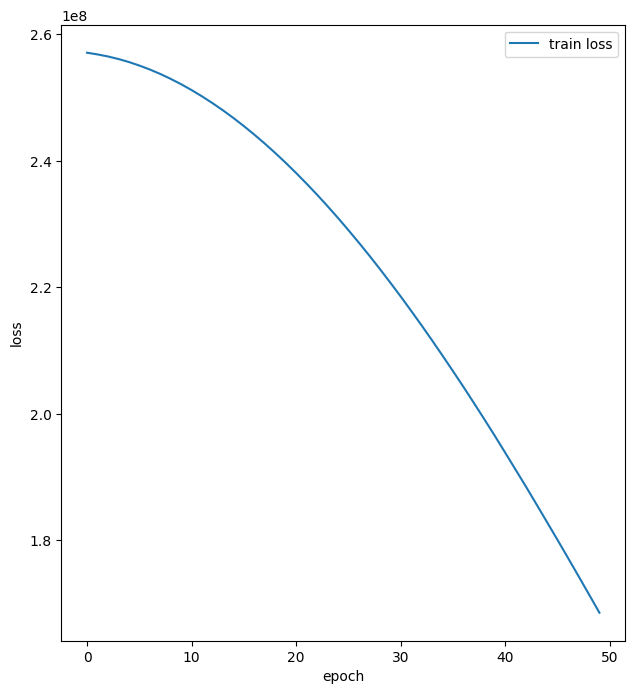

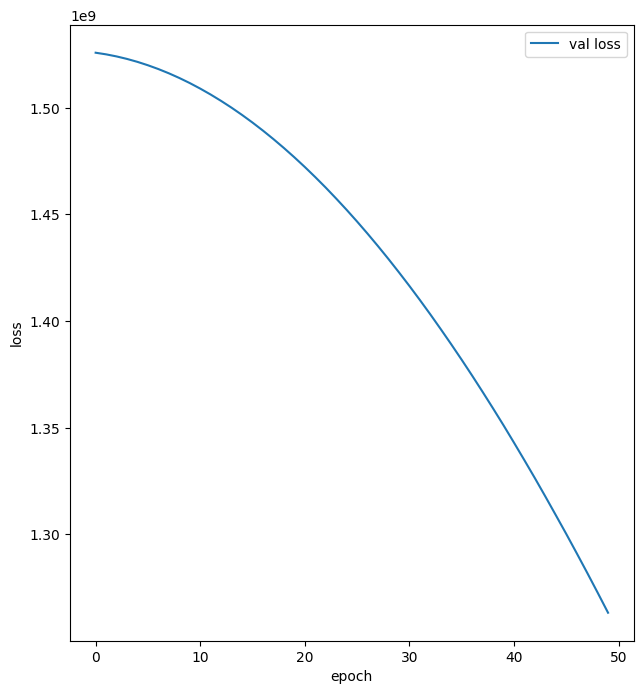

In [190]:
plot_history(history)

### 3.예측

In [191]:
X_test = X_test.dropna()
y_test = y_test[X_test.index]

X_test.shape, y_test.shape

((1191, 7), (1191,))

In [192]:
X_test_s = scaler.transform(X_test)
X_test_s[:10]

array([[0.8044032 , 0.80514974, 0.79554656, 0.06411574, 0.80952733,
        0.80542028, 0.7997259 ],
       [0.79985444, 0.80514974, 0.79922709, 0.04967543, 0.80952733,
        0.80988141, 0.79881224],
       [0.78802766, 0.79236669, 0.79186603, 0.04089076, 0.79998891,
        0.80950965, 0.79058931],
       [0.8044032 , 0.80971512, 0.81118881, 0.06991446, 0.80522025,
        0.81211197, 0.80749201],
       [0.79985444, 0.81154127, 0.80566802, 0.05278335, 0.80984158,
        0.81006729, 0.80566469],
       [0.79985444, 0.8106282 , 0.81026868, 0.04183101, 0.81723571,
        0.81415666, 0.80749201],
       [0.81622999, 0.8179328 , 0.82131027, 0.04541803, 0.8200085 ,
        0.81843191, 0.81754226],
       [0.81532023, 0.81610665, 0.81118881, 0.04846839, 0.81876999,
        0.821406  , 0.81160347],
       [0.80895197, 0.81245435, 0.81578947, 0.04883178, 0.81631144,
        0.82084836, 0.80840566],
       [0.79803493, 0.79875822, 0.7854251 , 0.14338298, 0.80244746,
        0.81397078, 0.7

In [193]:
X_test, y_test = make_sequence_dataset(X_test, y_test, 20)

X_test.shape, y_test.shape

((1171, 20, 7), (1171,))

In [194]:
y_test[:20]

array([43700., 43900., 44050., 45850., 46550., 45500., 45250., 45350.,
       44850., 44650., 45050., 45750., 46600., 46950., 46850., 46650.,
       46650., 46700., 46250., 46850.])

In [195]:
# 예측

y_pred = model.predict(X_test)
y_pred[:10]

37/37 [==============================] - 1s 5ms/step


array([[3673.6113],
       [3673.6113],
       [3673.6113],
       [3673.6113],
       [3673.6113],
       [3673.6113],
       [3673.6113],
       [3673.6113],
       [3673.6113],
       [3673.6113]], dtype=float32)

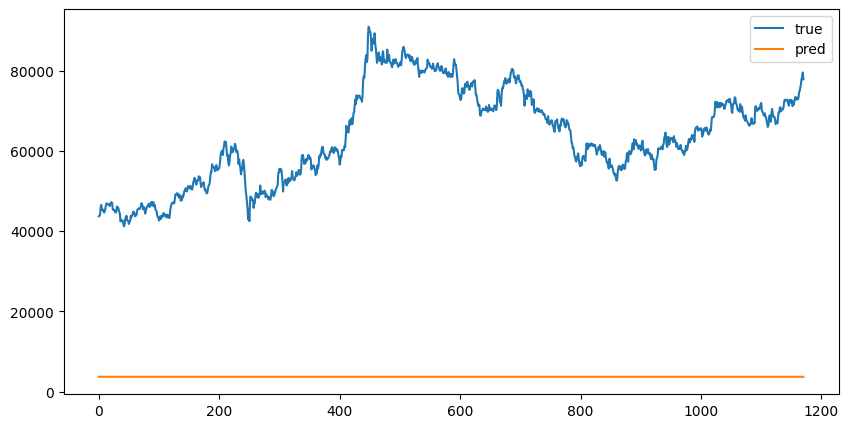

In [196]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="true")
plt.plot(y_pred, label="pred")
plt.legend()
plt.show()